In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin

In [8]:
start='2010-01-01'
end='2023-10-20'
yfin.pdr_override()
df=pdr.get_data_yahoo('AAPL',start,end)

df.shape
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900


In [9]:
df=df.reset_index()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3468,2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
3469,2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
3470,2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
3471,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
3472,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900


In [11]:
df=df.drop(['Date','Adj Close'],axis=1)
df.tail()

,Open,High,Low,Close,Volume
3468,181.419998,181.929993,178.139999,178.850006,51427100
3469,176.750000,179.080002,176.509995,178.720001,52517000
3470,176.649994,178.419998,174.800003,177.149994,57549400
3471,175.580002,177.580002,175.110001,175.839996,54764400
3472,176.039993,177.839996,175.190002,175.460007,59302900


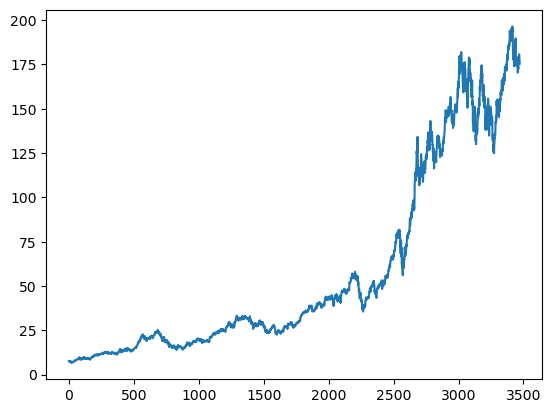

In [12]:
plt.plot(df.Close)


# defining moving average function'


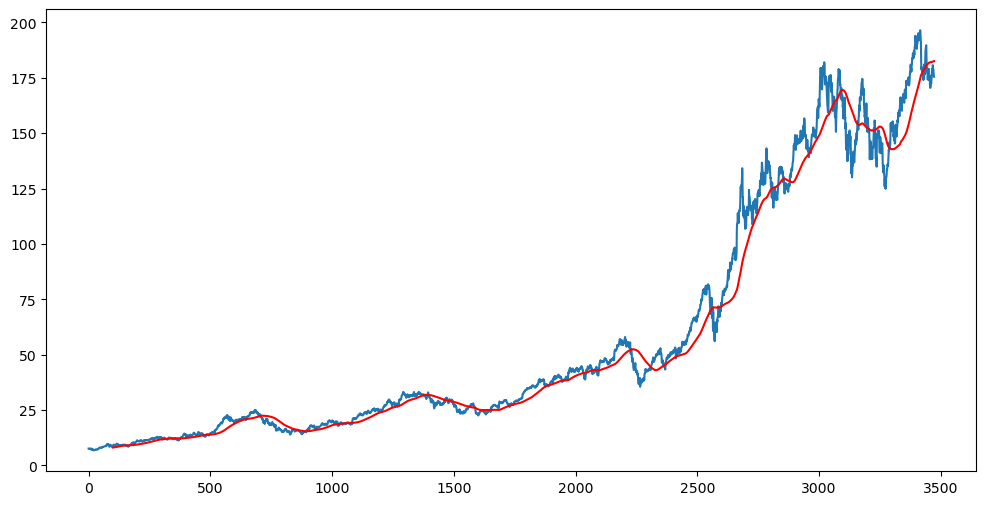

In [18]:
ma100=df.Close.rolling(100).mean()
ma100

#plotting graphs
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

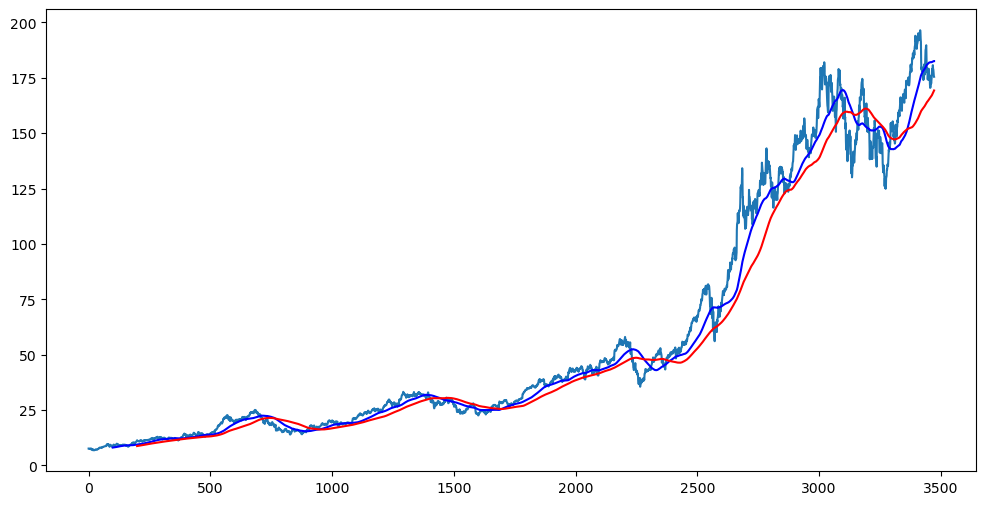

In [19]:
ma200=df.Close.rolling(200).mean()
ma200

#plotting graphs
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'b')
plt.plot(ma200,'r')

# splitting data

In [27]:


data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])

print(data_train.shape)
print(data_test.shape)


(2778, 1)
(695, 1)


In [30]:
data_test.head()


,Close
2778,127.139999
2779,127.830002
2780,132.029999
2781,136.869995
2782,139.070007


In [29]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


# scalling down data

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [32]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.00604081],
       [0.00614259],
       [0.00520456],
       ...,
       [0.93922873],
       [0.95532654],
       [0.94007599]])

In [38]:
x_training=[]
y_training=[]
for i in range(100,data_train_array.shape[0]):
    x_training.append(data_train_array[i-100:i])
    y_training.append(data_train_array[i,0])
    
x_training,y_training=np.array(x_training),np.array(y_training)


In [40]:
x_training.shape


(2678, 100, 1)

# ml model


In [39]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_training.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_training,y_training,epochs=70)

Epoch 1/70
84/84 [==============================] - 38s 330ms/step - loss: 0.0206
Epoch 2/70
84/84 [==============================] - 28s 337ms/step - loss: 0.0035
Epoch 3/70
84/84 [==============================] - 28s 338ms/step - loss: 0.0029
Epoch 4/70
84/84 [==============================] - 30s 352ms/step - loss: 0.0030
Epoch 5/70
84/84 [==============================] - 24s 289ms/step - loss: 0.0022
Epoch 6/70
84/84 [==============================] - 24s 289ms/step - loss: 0.0026
Epoch 7/70
84/84 [==============================] - 24s 285ms/step - loss: 0.0021
Epoch 8/70
84/84 [==============================] - 24s 289ms/step - loss: 0.0022
Epoch 9/70
84/84 [==============================] - 24s 289ms/step - loss: 0.0021
Epoch 10/70
84/84 [==============================] - 26s 309ms/step - loss: 0.0021
Epoch 11/70
84/84 [==============================] - 28s 336ms/step - loss: 0.0019
Epoch 12/70
84/84 [==============================] - 28s 340ms/step - loss: 0.0018
Epoch 13/70
8

In [46]:
model.save('keras_model.h5')

C:\Users\heman\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
data_test.head()

,Close
2778,127.139999
2779,127.830002
2780,132.029999
2781,136.869995
2782,139.070007


we are appending data of last 100 days of training to predict starting day of testing 


In [48]:
data_train.tail(100)

,Close
2678,125.857498
2679,124.824997
2680,126.522499
2681,125.010002
2682,124.807503
...,...
2773,132.050003
2774,128.979996
2775,128.800003
2776,130.889999


In [49]:
data_test.head()

,Close
2778,127.139999
2779,127.830002
2780,132.029999
2781,136.869995
2782,139.070007


In [50]:
past_100=data_train.tail(100)


In [51]:
final_df=past_100.append(data_test,ignore_index=True
                        )

C:\Users\heman\AppData\Local\Temp\ipykernel_11048\178573719.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100.append(data_test,ignore_index=True


In [52]:
final_df

,Close
0,125.857498
1,124.824997
2,126.522499
3,125.010002
4,124.807503
...,...
790,178.850006
791,178.720001
792,177.149994
793,175.839996


In [55]:
#now we have to again apply scalling
input_data=scaler.fit_transform(final_df)
input_data

array([[0.21222522],
       [0.20070305],
       [0.21964627],
       [0.20276761],
       [0.20050783],
       [0.24774017],
       [0.30509983],
       [0.27407652],
       [0.15667895],
       [0.15757173],
       [0.06673366],
       [0.11695127],
       [0.07421048],
       [0.0575829 ],
       [0.09507872],
       [0.09708743],
       [0.0590336 ],
       [0.03905814],
       [0.        ],
       [0.03615674],
       [0.05546257],
       [0.00312472],
       [0.01540012],
       [0.06070754],
       [0.09061492],
       [0.08090615],
       [0.10010045],
       [0.11103676],
       [0.06896552],
       [0.10780051],
       [0.07052792],
       [0.09195408],
       [0.09072654],
       [0.11304547],
       [0.19596033],
       [0.15913405],
       [0.16013844],
       [0.15478186],
       [0.13592233],
       [0.10199762],
       [0.1190716 ],
       [0.11192954],
       [0.09943091],
       [0.09150769],
       [0.09161931],
       [0.10891644],
       [0.04865529],
       [0.094

In [56]:
input_data.shape

(795, 1)

In [87]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [88]:
x_test_array,y_test_array=np.array(x_test),np.array(y_test)
print(x_test_array.shape)
print(y_test_array.shape)

(695, 100, 1)
(695,)


# making predictions

In [89]:
y_predicted=model.predict(x_test_array)

22/22 [==============================] - 2s 91ms/step


In [90]:
y_predicted.shape

(695, 1)

In [91]:
y_predicted

array([[0.25742304],
       [0.25613445],
       [0.25436148],
       [0.2525642 ],
       [0.25149328],
       [0.25211778],
       [0.25557435],
       [0.2621961 ],
       [0.27232218],
       [0.2854221 ],
       [0.29898262],
       [0.31056622],
       [0.31891903],
       [0.32319853],
       [0.32446328],
       [0.3239544 ],
       [0.32275528],
       [0.3214584 ],
       [0.32023796],
       [0.3190465 ],
       [0.31785458],
       [0.31624952],
       [0.31371582],
       [0.31000578],
       [0.30503178],
       [0.29882252],
       [0.29161686],
       [0.28353995],
       [0.27478048],
       [0.2655748 ],
       [0.25699377],
       [0.24943706],
       [0.24284095],
       [0.23689061],
       [0.23146969],
       [0.22616476],
       [0.22072986],
       [0.21508381],
       [0.20938058],
       [0.2038467 ],
       [0.19904023],
       [0.19529216],
       [0.19274314],
       [0.19113873],
       [0.19013056],
       [0.18956633],
       [0.18930161],
       [0.189

In [92]:
scaler.scale_  #gives factor by how much the value is scalled down

array([0.01115947])

In [93]:
#now inverse the scalling
scale_factor = 1 / 0.01115947

y_predicted = y_predicted *scale_factor
y_test_array = y_test_array *scale_factor

In [94]:
y_predicted

array([[23.067677],
       [22.952206],
       [22.793331],
       [22.632275],
       [22.53631 ],
       [22.592272],
       [22.902016],
       [23.49539 ],
       [24.402788],
       [25.576672],
       [26.79183 ],
       [27.829836],
       [28.578333],
       [28.961819],
       [29.075151],
       [29.029552],
       [28.922098],
       [28.805885],
       [28.696522],
       [28.589754],
       [28.482946],
       [28.339117],
       [28.112072],
       [27.779615],
       [27.333895],
       [26.777485],
       [26.131784],
       [25.408012],
       [24.623077],
       [23.798157],
       [23.02921 ],
       [22.352053],
       [21.760975],
       [21.227766],
       [20.741997],
       [20.266623],
       [19.7796  ],
       [19.273659],
       [18.762592],
       [18.2667  ],
       [17.835995],
       [17.50013 ],
       [17.271711],
       [17.127941],
       [17.037598],
       [16.987038],
       [16.963316],
       [16.94677 ],
       [16.922523],
       [16.88333 ],


<function matplotlib.pyplot.show(close=None, block=None)>

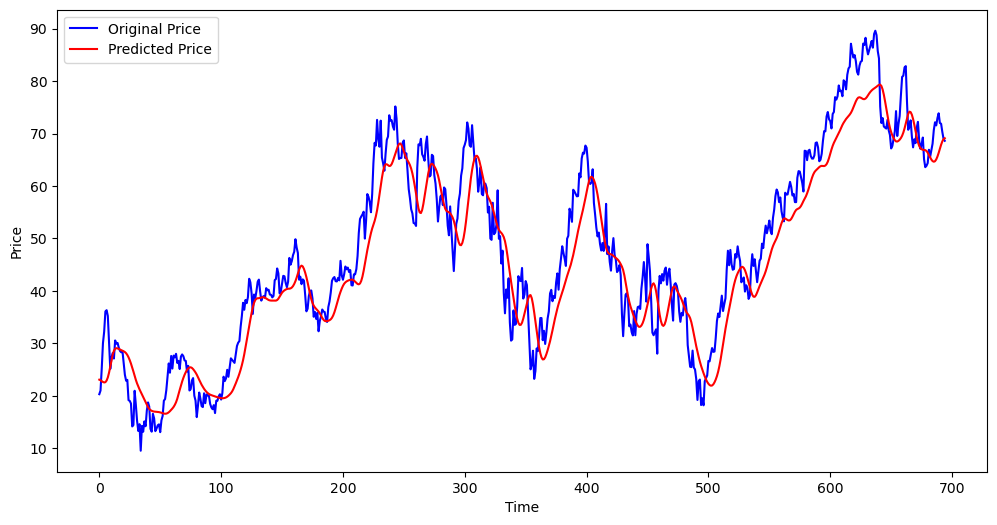

In [97]:
plt.figure(figsize=(12,6))
plt.plot(y_test_array,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show